# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings



In [3]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt




In [17]:
!pip install --upgrade matplotlib

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file

df = pd.read_parquet('/Users/anoopadur/Documents/AI_ML/Main-Course/EDA-Assignment/Dataset_and_DIctionary/trip_records/2023-1.parquet')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [439]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/anoopadur/Documents/AI_ML/Main-Course/EDA-Assignment/Dataset_and_DIctionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_file_data = pd.read_parquet(file_path)

        df_month = pd.read_parquet(file_path)

        # extract date and hour
        df_month['tpep_pickup_datetime'] = pd.to_datetime(df_month['tpep_pickup_datetime'])
        df_month['date_data'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['hour_data'] = df_month['tpep_pickup_datetime'].dt.hour

        # Sample 5% of data for each hour of each day
        sampled_data = df_month.groupby(['date_data', 'hour_data'], group_keys=False)\
                               .apply(lambda x: x.sample(frac=0.05, random_state=42), include_groups=False)

        # Concat sampled data to the dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

        # # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # # After completing iteration through each date, we will append this data to the final dataframe.

        # # Loop through dates and then loop through every hour of each date

        # Iterate through each hour of the selected date

            # Sample 5% of the hourly data randomly

            # add data of this hour to the dataframe

        #Concatenate the sampled data of all the dates to a single dataframe
        #we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Error reading file .DS_Store: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file sampled_data.csv: [Errno 2] No such file or directory: '/Users/anoopadur/Documents/AI_ML/Main-Course/EDA-Assignment/Dataset_and_DIctionary/trip_records/sampled_data.csv'


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [10]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_csv("sampled_data.csv", index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [12]:
# Load the new data file
df = pd.read_csv('/Users/anoopadur/Documents/AI_ML/Main-Course/EDA-Assignment/Dataset_and_DIctionary/trip_records/sampled_data.csv')


In [16]:
df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           0         2  2023-11-30 23:58:12   2023-12-01 00:06:58   
1           1         2  2023-11-30 23:58:35   2023-12-01 00:06:32   
2           2         2  2023-12-01 00:27:51   2023-12-01 00:50:12   
3           3         2  2023-12-01 00:38:48   2023-12-01 01:01:55   
4           4         2  2023-12-01 00:06:19   2023-12-01 00:16:57   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           1.31         1.0                  N   
1              1.0           1.22         1.0                  N   
2              1.0           3.99         1.0                  N   
3              NaN           4.79         NaN                NaN   
4              1.0           1.05         1.0                  N   

   PULocationID  DOLocationID  ...  fare_amount  extra  mta_tax  tip_amount  \
0           163           162  ...        10.00    1.0      0.5        3.00   
1           161           229  ...         9.30    1.0      0.5        1.43   
2           148            50  ...        23.30    1.0      0.5        5.66   
3           231            61  ...        22.43    0.0      0.5        3.00   
4           161           161  ...        10.70    1.0      0.5        3.14   

   tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0           0.0                    1.0         18.00                   2.5   
1           0.0                    1.0         15.73                   2.5   
2           0.0                    1.0         33.96                   2.5   
3           0.0                    1.0         29.43                   NaN   
4           0.0                    1.0         18.84                   2.5   

   Airport_fee  airport_fee  
0          0.0          NaN  
1          0.0          NaN  
2          0.0          NaN  
3          NaN          NaN  
4          0.0          NaN  

[5 rows x 21 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  Airport_fee            float64
 20  airport_fee            float64
dtypes: float64(13), int64(5), object(3)
memory usage: 303.

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [22]:
# Fix the index and drop any columns that are not needed

df = df.reset_index(drop=True)
df = df.drop(columns=['date_data', 'hour_data'], errors='ignore')


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [24]:
# Combine the two airport fee columns
df['airport_fee'] = df['Airport_fee'].combine_first(df['airport_fee'])
df.tail()
df.drop(columns = ['Airport_fee'], errors='ignore')

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0                 0         2  2023-11-30 23:58:12   2023-12-01 00:06:58   
1                 1         2  2023-11-30 23:58:35   2023-12-01 00:06:32   
2                 2         2  2023-12-01 00:27:51   2023-12-01 00:50:12   
3                 3         2  2023-12-01 00:38:48   2023-12-01 01:01:55   
4                 4         2  2023-12-01 00:06:19   2023-12-01 00:16:57   
...             ...       ...                  ...                   ...   
1896395     1896395         2  2023-06-30 23:53:10   2023-07-01 00:05:55   
1896396     1896396         1  2023-06-30 23:22:42   2023-06-30 23:39:06   
1896397     1896397         1  2023-06-30 23:50:42   2023-07-01 00:20:00   
1896398     1896398         1  2023-06-30 23:05:31   2023-06-30 23:15:52   
1896399     1896399         2  2023-07-01 00:00:51   2023-07-01 00:24:19   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                    1.0           1.31         1.0                  N   
1                    1.0           1.22         1.0                  N   
2                    1.0           3.99         1.0                  N   
3                    NaN           4.79         NaN                NaN   
4                    1.0           1.05         1.0                  N   
...                  ...            ...         ...                ...   
1896395              1.0           2.63         1.0                  N   
1896396              1.0           0.00        99.0                  N   
1896397              2.0           5.40         1.0                  N   
1896398              1.0           1.00         1.0                  N   
1896399              1.0           5.04         1.0                  N   

         PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0                 163           162             1        10.00    1.0   
1                 161           229             1         9.30    1.0   
2                 148            50             1        23.30    1.0   
3                 231            61             0        22.43    0.0   
4                 161           161             1        10.70    1.0   
...               ...           ...           ...          ...    ...   
1896395           170           143             1        14.20    1.0   
1896396            90           232             1        18.20    0.0   
1896397            87           161             1        32.40    3.5   
1896398            87           231             2        10.70    3.5   
1896399           209           225             1        25.40    1.0   

         mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0            0.5        3.00           0.0                    1.0   
1            0.5        1.43           0.0                    1.0   
2            0.5        5.66           0.0                    1.0   
3            0.5        3.00           0.0                    1.0   
4            0.5        3.14           0.0                    1.0   
...          ...         ...           ...                    ...   
1896395      0.5        4.80           0.0                    1.0   
1896396      0.5        0.00           0.0                    1.0   
1896397      0.5        2.00           0.0                    1.0   
1896398      0.5        0.00           0.0                    1.0   
1896399      0.5        4.56           0.0                    1.0   

         total_amount  congestion_surcharge  airport_fee  
0               18.00                   2.5          0.0  
1               15.73                   2.5          0.0  
2               33.96                   2.5          0.0  
3               29.43                   NaN          NaN  
4               18.84                   2.5          0.0  
...               ...                   ...          ...  
1896395         24.00                   2.5          0.0  
1896396         19.70        

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [26]:
# check where values of fare amount are negative
negative_fares = df[df['fare_amount'] < 0]
negative_fares.head()

#Count of negative fare values 
negative_fares_count = df[df['fare_amount'] < 0].sum()
print("Negative Fares Count", negative_fares_count)
# No records found in the sampling with negative fare values

Negative Fares Count Unnamed: 0                 0
VendorID                   0
tpep_pickup_datetime       0
tpep_dropoff_datetime      0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag         0
PULocationID               0
DOLocationID               0
payment_type               0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
Airport_fee              0.0
airport_fee              0.0
dtype: object


Did you notice something different in the `RatecodeID` column for above records?

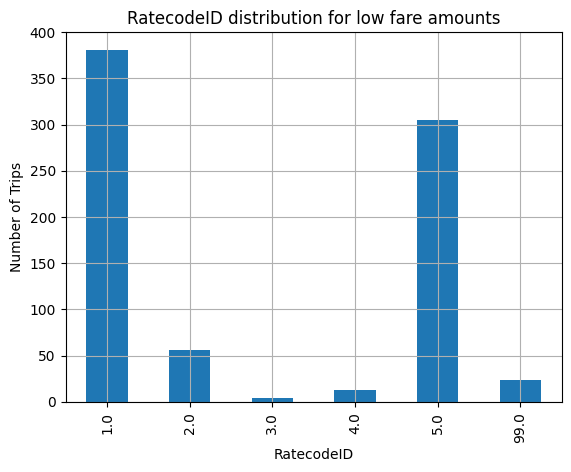

In [28]:
# Analyse RatecodeID for the negative fare amounts
# Since no negative fare amount -> attempting ratecode analysis for data where fare amount < 1.0 
low_fares = df[df['fare_amount'] < 1]
ratecode_analysis = low_fares['RatecodeID'].value_counts().sort_index()
#ratecode_analysis.describe()

ratecode_analysis.plot(kind='bar')
plt.title('RatecodeID distribution for low fare amounts')
plt.xlabel('RatecodeID')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

In [30]:
# Find which columns have negative values

negative_columns = (df.select_dtypes(include='number') < 0).any()
columns_with_negatives = negative_columns[negative_columns].index.tolist()
print("Columns with negative values:", columns_with_negatives)

Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'airport_fee']


In [32]:
# fix these negative values
for col in columns_with_negatives:
    df[col] = df[col].clip(lower=0)

In [34]:
# Check the df after fixing/dropping negative values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  Airport_fee            float64
 20  airport_fee            float64
dtypes: float64(13), int64(5), object(3)
memory usage: 303.

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [36]:
# Find the proportion of missing values in each column

missing_values = df.isnull().mean() * 100
print (missing_values)

Unnamed: 0                0.000000
VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           3.420903
trip_distance             0.000000
RatecodeID                3.420903
store_and_fwd_flag        3.420903
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      3.420903
Airport_fee              11.250633
airport_fee               3.420903
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [38]:
# Display the rows with null values

rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213357 entries, 3 to 1896383
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             213357 non-null  int64  
 1   VendorID               213357 non-null  int64  
 2   tpep_pickup_datetime   213357 non-null  object 
 3   tpep_dropoff_datetime  213357 non-null  object 
 4   passenger_count        148483 non-null  float64
 5   trip_distance          213357 non-null  float64
 6   RatecodeID             148483 non-null  float64
 7   store_and_fwd_flag     148483 non-null  object 
 8   PULocationID           213357 non-null  int64  
 9   DOLocationID           213357 non-null  int64  
 10  payment_type           213357 non-null  int64  
 11  fare_amount            213357 non-null  float64
 12  extra                  213357 non-null  float64
 13  mta_tax                213357 non-null  float64
 14  tip_amount             213357 non-null  

In [40]:
# Impute NaN values in 'passenger_count'
#Filling the missing passenger count with 1 as taxi passenger could mostly have 1 passenger. 
df['passenger_count'] = df['passenger_count'].fillna(1)

Did you find zeroes in passenger_count? Handle these.

In [42]:
zeros_inpassenger_counts = df[df['passenger_count'] == 0]
zeros_inpassenger_counts.info()

#Found zeros in passengers list 

<class 'pandas.core.frame.DataFrame'>
Index: 29681 entries, 154 to 1896305
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             29681 non-null  int64  
 1   VendorID               29681 non-null  int64  
 2   tpep_pickup_datetime   29681 non-null  object 
 3   tpep_dropoff_datetime  29681 non-null  object 
 4   passenger_count        29681 non-null  float64
 5   trip_distance          29681 non-null  float64
 6   RatecodeID             29681 non-null  float64
 7   store_and_fwd_flag     29681 non-null  object 
 8   PULocationID           29681 non-null  int64  
 9   DOLocationID           29681 non-null  int64  
 10  payment_type           29681 non-null  int64  
 11  fare_amount            29681 non-null  float64
 12  extra                  29681 non-null  float64
 13  mta_tax                29681 non-null  float64
 14  tip_amount             29681 non-null  float64
 15  tol

In [44]:
#Handling zeros in passengers data 
#updating the zero to 1 as zero is invalid passenger count to 1
#1 is safest (in terms of analysis) of passenger count 

df.loc[df['passenger_count'] == 0, 'passenger_count'] = 1



**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [46]:
df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           0         2  2023-11-30 23:58:12   2023-12-01 00:06:58   
1           1         2  2023-11-30 23:58:35   2023-12-01 00:06:32   
2           2         2  2023-12-01 00:27:51   2023-12-01 00:50:12   
3           3         2  2023-12-01 00:38:48   2023-12-01 01:01:55   
4           4         2  2023-12-01 00:06:19   2023-12-01 00:16:57   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           1.31         1.0                  N   
1              1.0           1.22         1.0                  N   
2              1.0           3.99         1.0                  N   
3              1.0           4.79         NaN                NaN   
4              1.0           1.05         1.0                  N   

   PULocationID  DOLocationID  ...  fare_amount  extra  mta_tax  tip_amount  \
0           163           162  ...        10.00    1.0      0.5        3.00   
1           161           229  ...         9.30    1.0      0.5        1.43   
2           148            50  ...        23.30    1.0      0.5        5.66   
3           231            61  ...        22.43    0.0      0.5        3.00   
4           161           161  ...        10.70    1.0      0.5        3.14   

   tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0           0.0                    1.0         18.00                   2.5   
1           0.0                    1.0         15.73                   2.5   
2           0.0                    1.0         33.96                   2.5   
3           0.0                    1.0         29.43                   NaN   
4           0.0                    1.0         18.84                   2.5   

   Airport_fee  airport_fee  
0          0.0          0.0  
1          0.0          0.0  
2          0.0          0.0  
3          NaN          NaN  
4          0.0          0.0  

[5 rows x 21 columns]

In [51]:
# Fix missing values in 'RatecodeID'
# Verified how many values of RatecodeID are 1.0 and setting the missing RateCodeID to 1.0
#missing_ratecode_1 = (df['RatecodeID'] == 1.0).sum()
#print("Missing entries ", missing_ratecode_1)
df['RatecodeID'] = df['RatecodeID'].fillna(1)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [71]:
# handle null values in congestion_surcharge
# Identifying the analyzing the null values in congestion_surcharge
df_congestion = df['congestion_surcharge']
df_congestion.mode()
missing_congestion = ['congestion_surcharge'].isnull().sum()
print(f"Missing congestion_surcharge values: {missing_congestion}")

Missing congestion_surcharge values: 1690572


0    2.5
Name: congestion_surcharge, dtype: float64

In [75]:
# handle null values in congestion_surcharge
# Since the mode of the df_congestion is 2.5 fixing handling the null values of the by updating the null values with 2.5
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(2.5)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [81]:
# Handle any remaining missing values
missing_values = df.isnull().mean() * 100
print (missing_values)


Unnamed: 0                0.000000
VendorID                  0.000000
tpep_pickup_datetime      0.000000
tpep_dropoff_datetime     0.000000
passenger_count           0.000000
trip_distance             0.000000
RatecodeID                0.000000
store_and_fwd_flag        3.420903
PULocationID              0.000000
DOLocationID              0.000000
payment_type              0.000000
fare_amount               0.000000
extra                     0.000000
mta_tax                   0.000000
tip_amount                0.000000
tolls_amount              0.000000
improvement_surcharge     0.000000
total_amount              0.000000
congestion_surcharge      0.000000
Airport_fee              11.250633
airport_fee               3.420903
dtype: float64


In [91]:
# Handling missing stored_and_fwd flag 
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')

In [99]:
# Handling missing airport_fee data 
df['airport_fee'] = df['airport_fee'].fillna(0.0)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

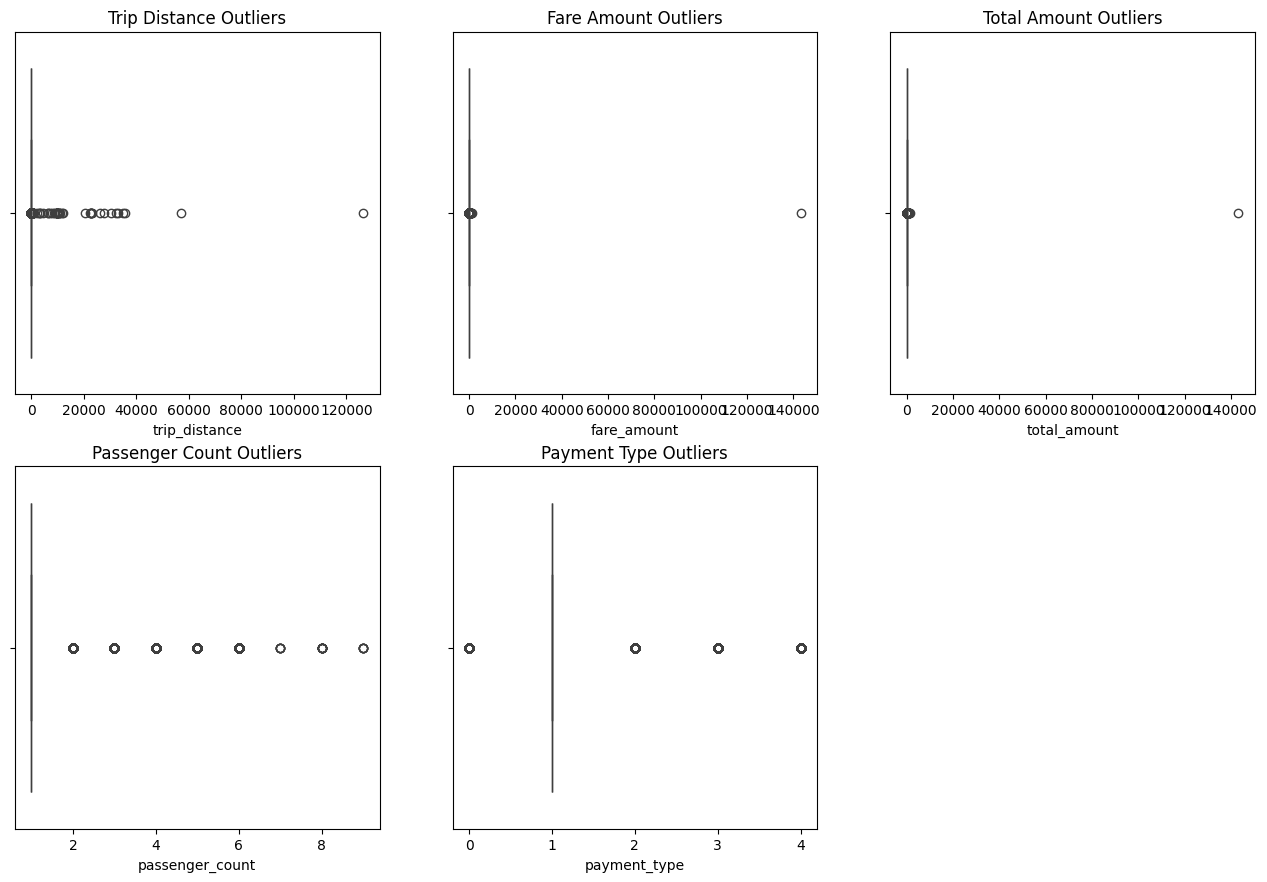

In [132]:
# Describe the data and check if there are any potential outliers present
df.describe()
# Check for potential out of place values in various columns
# Analyzing the passenger_count , trip_distance, total_amount, fare amount payment_type for any outliers. 

# Quick boxplots
plt.figure(figsize=(16,16))

plt.subplot(3,3,1)
sns.boxplot(x=df['trip_distance'])
plt.title('Trip Distance Outliers')

plt.subplot(3,3,2)
sns.boxplot(x=df['fare_amount'])
plt.title('Fare Amount Outliers')

plt.subplot(3,3,3)
sns.boxplot(x=df['total_amount'])
plt.title('Total Amount Outliers')

plt.subplot(3,3,4)
sns.boxplot(x=df['passenger_count'])
plt.title('Passenger Count Outliers')

plt.subplot(3,3,5)
sns.boxplot(x=df['payment_type'])
plt.title('Payment Type Outliers')

plt.show()


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [134]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [138]:
# Continue with outlier handling
#Entries where trip_distance is nearly 0 and fare_amount is more than 300 
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]



In [142]:
# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different 
# (both distance and fare should not be zero for different zones)
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

In [144]:
# Entries where trip_distance is more than 250 miles.
df = df[df['trip_distance'] <= 250]

In [146]:
# Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
df = df[df['payment_type'] != 0]

In [148]:
# Entries where total amount is very high or low - part 1
df = df[df['total_amount'] >= 0]

In [196]:
# Entries where total amount is very high or low - part 2
#Dropping columns which have total amount greater than $1000
higher_amounts = df[df['total_amount'] >= 1000]
higher_amounts.size
df = df[(df['total_amount'] >= 0) & (df['total_amount'] <= 1000)]
df = df.reset_index(drop=True)

In [ ]:
# Do any columns need standardising?

Yes trip_distance, fare_amount , total_amount could require standarisation. 

In [220]:
df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           0         2  2023-11-30 23:58:12   2023-12-01 00:06:58   
1           1         2  2023-11-30 23:58:35   2023-12-01 00:06:32   
2           2         2  2023-12-01 00:27:51   2023-12-01 00:50:12   
3           4         2  2023-12-01 00:06:19   2023-12-01 00:16:57   
4           6         2  2023-12-01 00:16:07   2023-12-01 00:19:17   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           1.31         1.0                  N   
1              1.0           1.22         1.0                  N   
2              1.0           3.99         1.0                  N   
3              1.0           1.05         1.0                  N   
4              1.0           0.40         1.0                  N   

   PULocationID  DOLocationID  ...  fare_amount  extra  mta_tax  tip_amount  \
0           163           162  ...         10.0    1.0      0.5        3.00   
1           161           229  ...          9.3    1.0      0.5        1.43   
2           148            50  ...         23.3    1.0      0.5        5.66   
3           161           161  ...         10.7    1.0      0.5        3.14   
4            68            68  ...          5.1    1.0      0.5        0.00   

   tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0           0.0                    1.0         18.00                   2.5   
1           0.0                    1.0         15.73                   2.5   
2           0.0                    1.0         33.96                   2.5   
3           0.0                    1.0         18.84                   2.5   
4           0.0                    1.0         10.10                   2.5   

   Airport_fee  airport_fee  
0          0.0          0.0  
1          0.0          0.0  
2          0.0          0.0  
3          0.0          0.0  
4          0.0          0.0  

[5 rows x 21 columns]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [200]:
df.columns.tolist()

['Unnamed: 0',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

# Numerical : 
passenger_count, 
trip_distance, 
pickup_hour, 
trip_duration, 
monetary columns (fare_amount, extra, etc.)

# Categorical:
VendorID, 
tpep_pickup_datetime, 
tpep_dropoff_datetime, 
RatecodeID, 
PULocationID, 
DOLocationID, 
payment_type

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

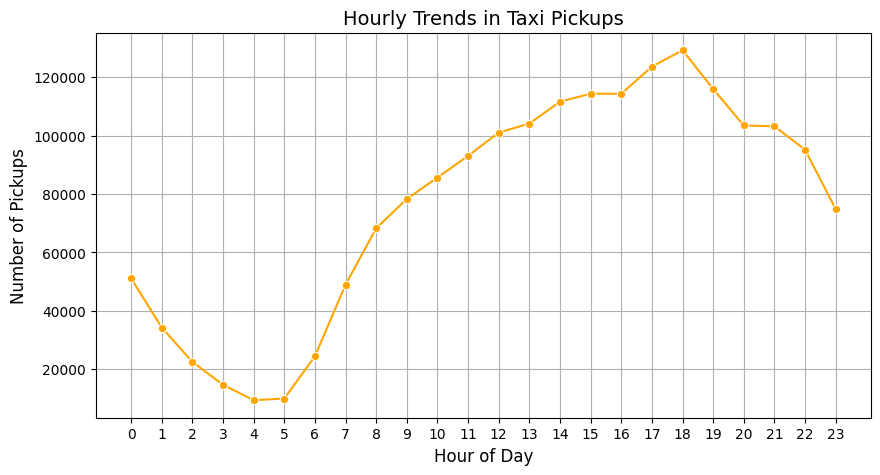

In [224]:
# Find and show the hourly trends in taxi pickups
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_pickup = df.groupby('pickup_hour').size().reset_index(name='pickup_count')
plt.figure(figsize=(10,5))
sns.lineplot(x='pickup_hour', y='pickup_count', data=hourly_pickup, marker="o", color="orange")
plt.title('Hourly Trends in Taxi Pickups', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


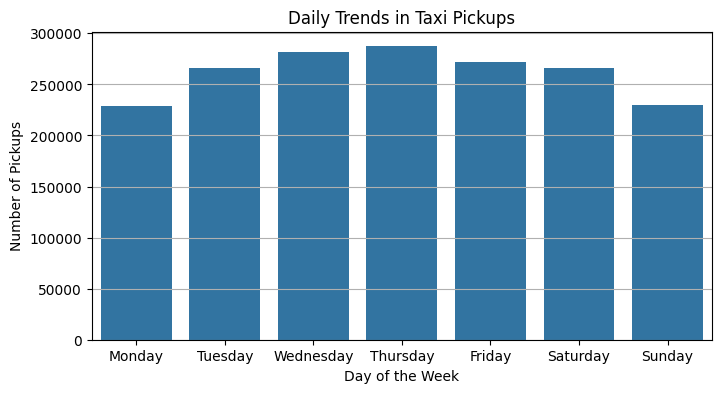

In [248]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

days_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

df['pickup_day_name'] = df['pickup_day_of_week'].map(days_dict)

daily_pickups = df.groupby('pickup_day_name').size().reset_index(name='pickup_count')
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_pickups['pickup_day_name'] = pd.Categorical(daily_pickups['pickup_day_name'], categories=week_order, ordered=True)
daily_pickups = daily_pickups.sort_values('pickup_day_name')

plt.figure(figsize=(8,4))
sns.barplot(x='pickup_day_name', y='pickup_count', data=daily_pickups)
plt.title('Daily Trends in Taxi Pickups', fontsize=12)
plt.xlabel('Day of the Week', fontsize=10)
plt.ylabel('Number of Pickups', fontsize=10)
plt.grid(axis='y')
plt.show()


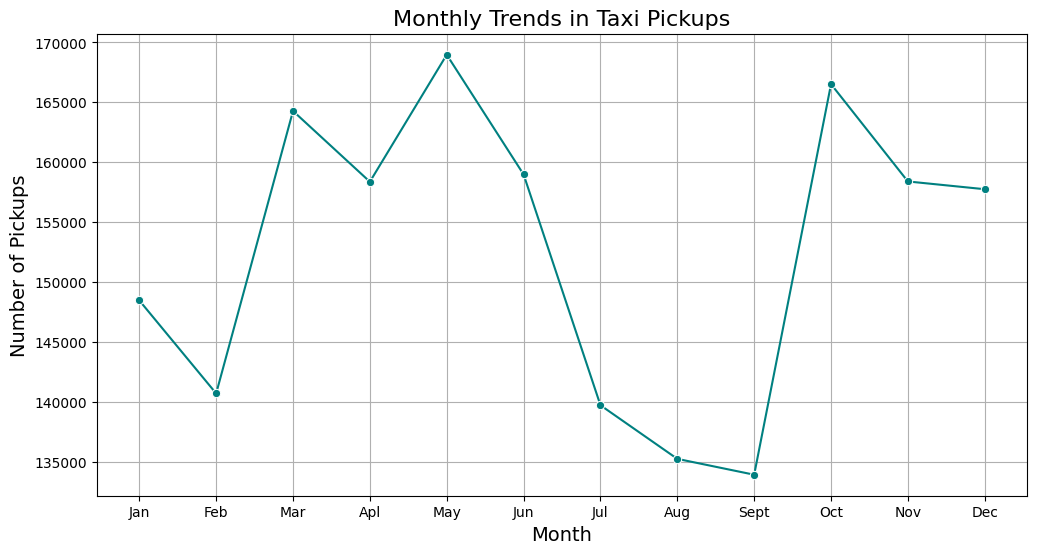

In [234]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
monthly_pickups = df.groupby('pickup_month').size().reset_index(name='pickup_count')
plt.figure(figsize=(12,6))
sns.lineplot(x='pickup_month', y='pickup_count', data=monthly_pickups, marker="o", color="teal")
plt.title('Monthly Trends in Taxi Pickups', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Pickups', fontsize=14)
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apl', 'May', 'Jun',
                                      'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [238]:
df = df[(df['fare_amount'] >= 0) & (df['tip_amount'] >= 0) &(df['total_amount'] >= 0) &(df['trip_distance'] >= 0)]

In [242]:
# Analyse the above parameters
analyze_amt_distance = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df[analyze_amt_distance].describe()


fare_amount    tip_amount  total_amount  trip_distance
count  1.831389e+06  1.831389e+06  1.831389e+06   1.831389e+06
mean   1.973776e+01  3.573530e+00  2.886129e+01   3.444729e+00
std    1.823222e+01  4.069437e+00  2.285372e+01   4.543337e+00
min    0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00
25%    9.300000e+00  1.000000e+00  1.596000e+01   1.050000e+00
50%    1.350000e+01  2.860000e+00  2.100000e+01   1.780000e+00
75%    2.190000e+01  4.450000e+00  3.070000e+01   3.370000e+00
max    7.863000e+02  2.230800e+02  7.905500e+02   2.041000e+02

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [251]:
# Create a df with non zero entries for the selected parameters.
df_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Create a copy where none of these are zero
df_clean = df.copy()

for col in df_columns:
    df_clean = df_clean[df_clean[col] > 0]



**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

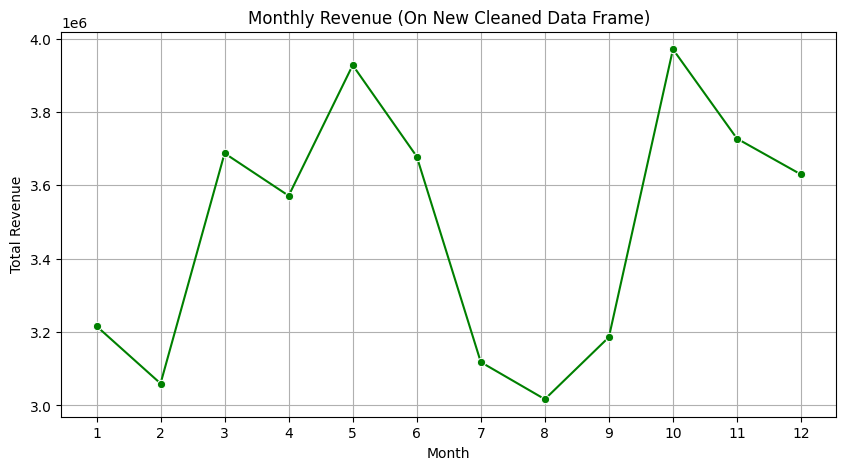

In [269]:
# Group data by month and analyse monthly revenue
df_clean['tpep_pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'])
df_clean['pickup_month'] = df_clean['tpep_pickup_datetime'].dt.month
monthly_revenue_clean = (df_clean.groupby('pickup_month')['total_amount'].sum().reset_index()
                         .rename(columns={'pickup_month': 'Month', 'total_amount': 'Total_Revenue'}))

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_revenue_clean, x='Month', y='Total_Revenue', marker='o', color='green')
plt.title('Monthly Revenue (On New Cleaned Data Frame)', fontsize=12)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(ticks=range(1,13))
plt.grid(True)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [255]:
# Calculate proportion of each quarter
df_clean['pickup_quarter'] = df_clean['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = ( df_clean.groupby('pickup_quarter')['total_amount'].sum() .reset_index()
                     .rename(columns={'pickup_quarter': 'Quarter', 'total_amount': 'Total_Revenue'}))

quarterly_revenue['Revenue_Proportion'] = (quarterly_revenue['Total_Revenue'] / quarterly_revenue['Total_Revenue'].sum()) * 100

In [257]:
print(quarterly_revenue)

   Quarter  Total_Revenue  Revenue_Proportion
0        1     9963645.00           23.841338
1        2    11178147.59           26.747439
2        3     9321333.78           22.304394
3        4    11328341.54           27.106829


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

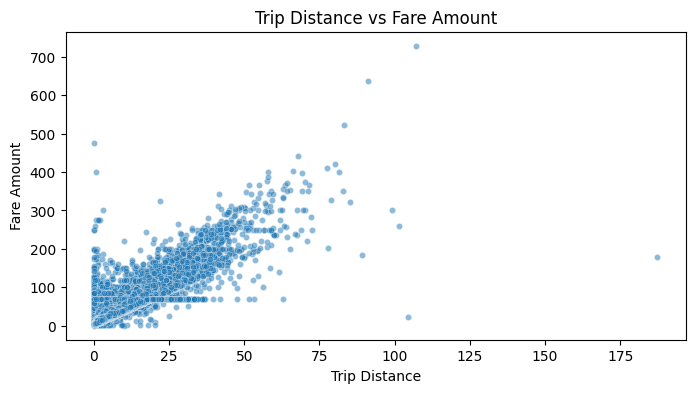

In [303]:
# Show how trip fare is affected by distance

plt.figure(figsize=(8,4))

# Scatter plot
sns.scatterplot(data=df_clean,  x='trip_distance', y='fare_amount', alpha=0.5,s=20)

plt.title('Trip Distance vs Fare Amount', fontsize=12)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

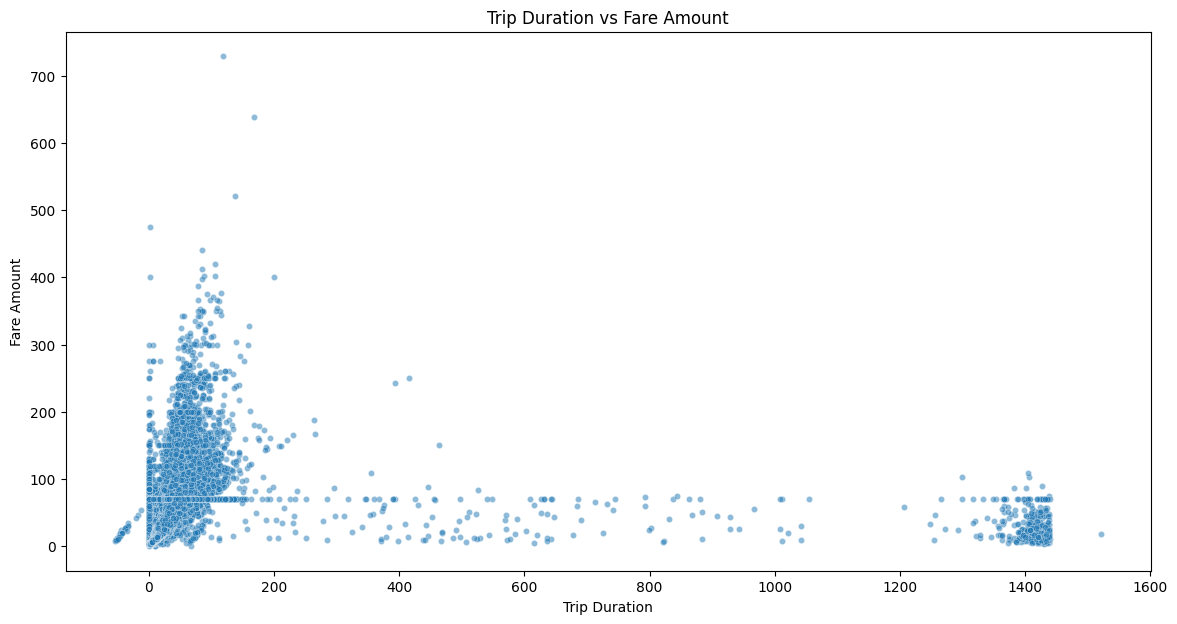

In [305]:
# Show relationship between fare and trip duration
df_clean['tpep_pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'])
df_clean['tpep_dropoff_datetime'] = pd.to_datetime(df_clean['tpep_dropoff_datetime'])
df_clean['trip_duration'] = (df_clean['tpep_dropoff_datetime'] - df_clean['tpep_pickup_datetime']).dt.total_seconds() / 60
plt.figure(figsize=(14,7))

sns.scatterplot(data=df_clean, x='trip_duration', y='fare_amount', alpha=0.5, s=20)

plt.title('Trip Duration vs Fare Amount', fontsize=12)
plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')
plt.show()

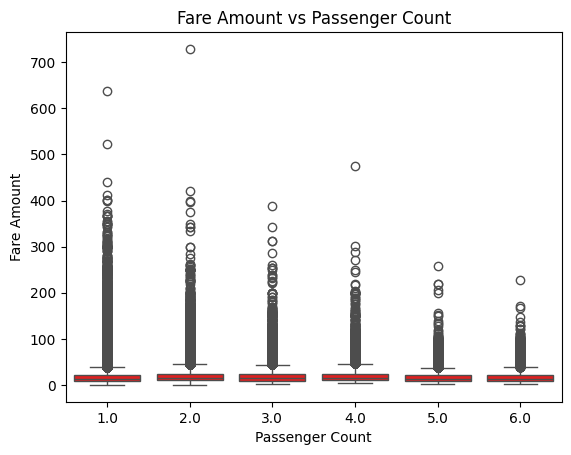

In [307]:
# Show relationship between fare and number of passengers
sns.boxplot(data=df_clean,x='passenger_count',y='fare_amount', color = 'red')

plt.title('Fare Amount vs Passenger Count', fontsize=12)
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()


In [291]:
# Show relationship between tip and trip distance
correlation_tip_distance = df_clean['trip_distance'].corr(df_clean['tip_amount'])
print (correlation_tip_distance)


0.7990691171667721


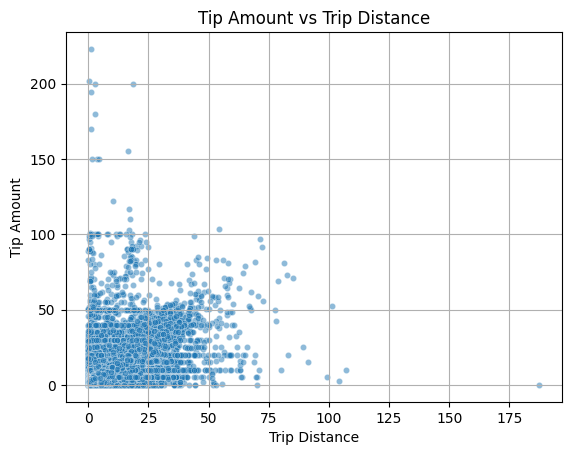

In [293]:
# Attempted plotting for the corr
sns.scatterplot(data=df_clean, x='trip_distance',y='tip_amount',alpha=0.5,s=20)

plt.title('Tip Amount vs Trip Distance', fontsize=12)
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.grid(True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [295]:
# Analyse the distribution of different payment types (payment_type).
payment_counts = df_clean['payment_type'].value_counts()
payment_percentages = df_clean['payment_type'].value_counts(normalize=True) * 100
print(payment_counts)
print(payment_percentages)


payment_type
1    1412859
2         23
4         16
3          7
Name: count, dtype: int64
payment_type
1    99.996744
2     0.001628
4     0.001132
3     0.000495
Name: proportion, dtype: float64


In [297]:
payment_mapping = {
1: 'Credit Card',
2: 'Cash',
3: 'No Charge',
4: 'Dispute'}
df_clean['payment_type_mapped'] = df_clean['payment_type'].map(payment_mapping)

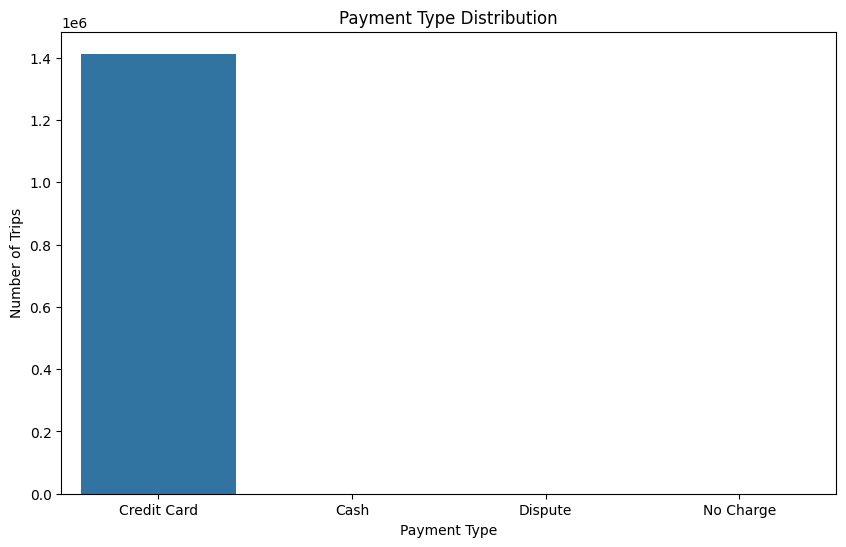

In [301]:
# PLotting 
plt.figure(figsize=(10,6))

sns.countplot(data=df_clean, x='payment_type_mapped', order=df_clean['payment_type_mapped'].value_counts().index)

plt.title('Payment Type Distribution', fontsize=12)
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [311]:
pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 2.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [321]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/Users/anoopadur/Documents/AI_ML/Main-Course/EDA-Assignment/Dataset_and_DIctionary/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

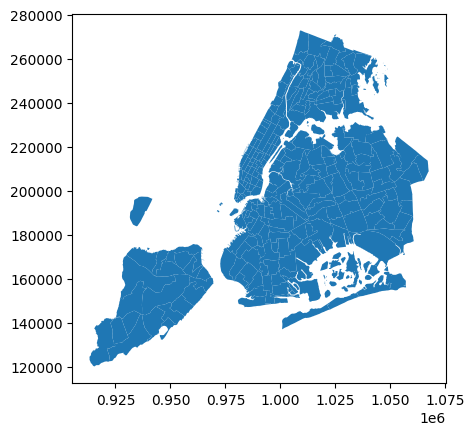

In [323]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [325]:
# Merge zones and trip records using locationID and PULocationID
merged_data = df_clean.merge(zones, how='left', left_on='PULocationID', right_on='LocationID')

# Check the result of the merge
merged_data.head()


Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           0         2  2023-11-30 23:58:12   2023-12-01 00:06:58   
1           1         2  2023-11-30 23:58:35   2023-12-01 00:06:32   
2           2         2  2023-12-01 00:27:51   2023-12-01 00:50:12   
3           4         2  2023-12-01 00:06:19   2023-12-01 00:16:57   
4           7         2  2023-12-01 00:57:08   2023-12-01 01:05:49   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           1.31         1.0                  N   
1              1.0           1.22         1.0                  N   
2              1.0           3.99         1.0                  N   
3              1.0           1.05         1.0                  N   
4              1.0           1.66         1.0                  N   

   PULocationID  DOLocationID  ...  pickup_quarter  trip_duration  \
0           163           162  ...               4       8.766667   
1           161           229  ...               4       7.950000   
2           148            50  ...               4      22.350000   
3           161           161  ...               4      10.633333   
4           114           186  ...               4       8.683333   

   payment_type_mapped  OBJECTID  Shape_Leng  Shape_Area  \
0          Credit Card     163.0    0.034177    0.000041   
1          Credit Card     161.0    0.035804    0.000072   
2          Credit Card     148.0    0.039131    0.000070   
3          Credit Card     161.0    0.035804    0.000072   
4          Credit Card     114.0    0.031727    0.000047   

                      zone  LocationID    borough  \
0            Midtown North       163.0  Manhattan   
1           Midtown Center       161.0  Manhattan   
2          Lower East Side       148.0  Manhattan   
3           Midtown Center       161.0  Manhattan   
4  Greenwich Village South       114.0  Manhattan   

                                            geometry  
0  POLYGON ((989412.663 219020.943, 990045.841 21...  
1  POLYGON ((991081.026 214453.698, 990952.644 21...  
2  POLYGON ((988552.836 201677.665, 988387.669 20...  
3  POLYGON ((991081.026 214453.698, 990952.644 21...  
4  POLYGON ((986306.712 203122.786, 986300.242 20...  

[5 rows x 35 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [329]:
# Group data by location and calculate the number of trips
trips_by_location = merged_data.groupby('PULocationID').size().reset_index(name='num_trips')
trips_by_location.head()


PULocationID  num_trips
0             1         35
1             2          2
2             4       1403
3             6          1
4             7        253

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [331]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trip_counts = zones.merge(trips_by_location, how='left', left_on='LocationID', right_on='PULocationID')
zones_with_trip_counts.head()



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  num_trips  
0           1.0       35.0  
1           2.0        2.0  
2           NaN        NaN  
3           4.0     1403.0  
4           NaN        NaN

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Axes: >

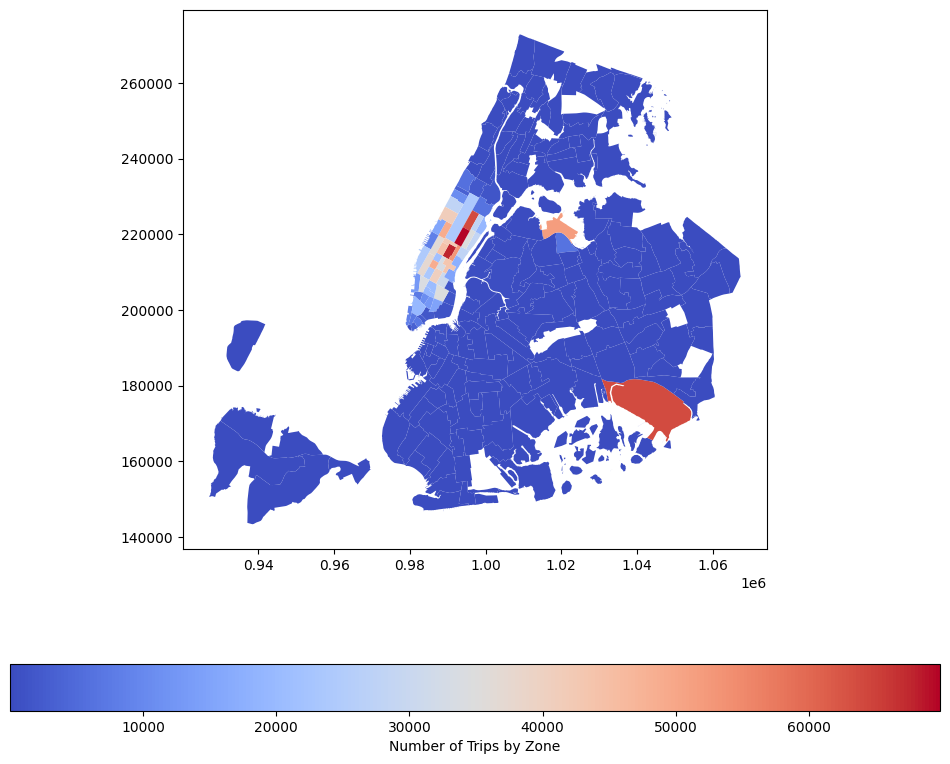

In [333]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones_with_trip_counts.plot(column='num_trips', cmap='coolwarm', ax=ax, legend=True,                       
legend_kwds={'label': "Number of Trips by Zone", 'orientation': 'horizontal'} )


In [335]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zones_with_trip_counts.sort_values(by='num_trips', ascending=False)
sorted_zones.head()

OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
131       132    0.245479    0.002038            JFK Airport         132   
161       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry  \
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   

     PULocationID  num_trips  
236         237.0    69858.0  
160         161.0    67730.0  
235         236.0    63695.0  
131         132.0    63639.0  
161         162.0    52690.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [341]:
# Find routes which have the slowest speeds at different times of the day
df_clean['trip_duration_minutes'] = df_clean['trip_duration'] / 60
df_clean['speed'] = df_clean['trip_distance'] / df_clean['trip_duration_minutes']
df_clean['pickup_hour'] = pd.to_datetime(df_clean['tpep_pickup_datetime']).dt.hour
slowest_routes = df_clean.loc[df_clean.groupby('pickup_hour')['speed'].idxmin()]
slowest_routes.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
1065086     1105592         2  2023-08-27 00:09:50   2023-08-27 23:45:05   
650032       673401         2  2023-11-05 01:22:28   2023-11-05 01:10:25   
1661270     1721178         2  2023-03-30 02:34:32   2023-03-31 02:06:35   
82641         86855         2  2023-12-15 03:48:55   2023-12-16 03:41:03   
1723426     1785164         2  2023-06-10 04:23:10   2023-06-10 04:44:54   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
1065086              1.0           0.95         1.0                  N   
650032               1.0           9.88         1.0                  N   
1661270              6.0           0.77         1.0                  N   
82641                1.0           1.40         1.0                  N   
1723426              1.0           0.01         1.0                  N   

         PULocationID  DOLocationID  ...  airport_fee  pickup_hour  \
1065086           148           107  ...          0.0            0   
650032            114           120  ...          0.0            1   
1661270            68            68  ...          0.0            2   
82641              79           249  ...          0.0            3   
1723426           264           264  ...          0.0            4   

         pickup_day_of_week  pickup_day_name  pickup_month  pickup_quarter  \
1065086                   6           Sunday             8               3   
650032                    6           Sunday            11               4   
1661270                   3         Thursday             3               1   
82641                     4           Friday            12               4   
1723426                   5         Saturday             6               2   

         trip_duration  payment_type_mapped  trip_duration_minutes      speed  
1065086    1415.250000          Credit Card              23.587500   0.040276  
650032      -12.050000          Credit Card              -0.200833 -49.195021  
1661270    1412.050000          Credit Card              23.534167   0.032718  
82641      1432.133333          Credit Card              23.868889   0.058654  
1723426      21.733333          Credit Card               0.362222   0.027607  

[5 rows x 30 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

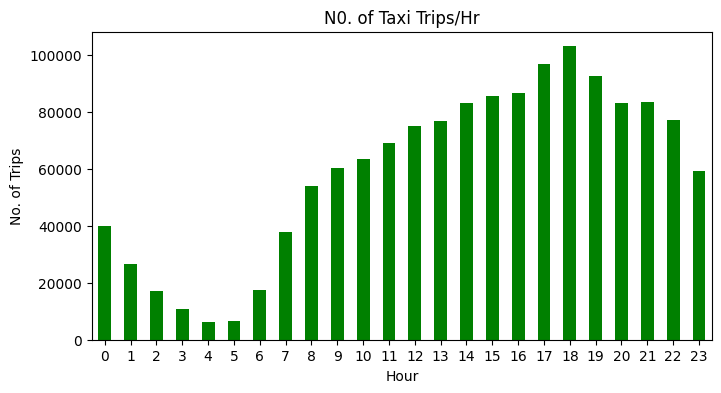

In [345]:
# Visualise the number of trips per hour and find the busiest hour
df_clean['pickup_hour'] = pd.to_datetime(df_clean['tpep_pickup_datetime']).dt.hour
hour_trips = df_clean.groupby('pickup_hour').size()
fig, ax = plt.subplots(figsize=(8, 4))
hour_trips.plot(kind='bar', ax=ax, color='green')
ax.set_xlabel('Hour')
ax.set_ylabel('No. of Trips')
ax.set_title('N0. of Taxi Trips/Hr')
plt.xticks(rotation=0)
plt.show()
busiest_hour = hour_trips.idxmax()
busiest_hour_count = hour_trips.max()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

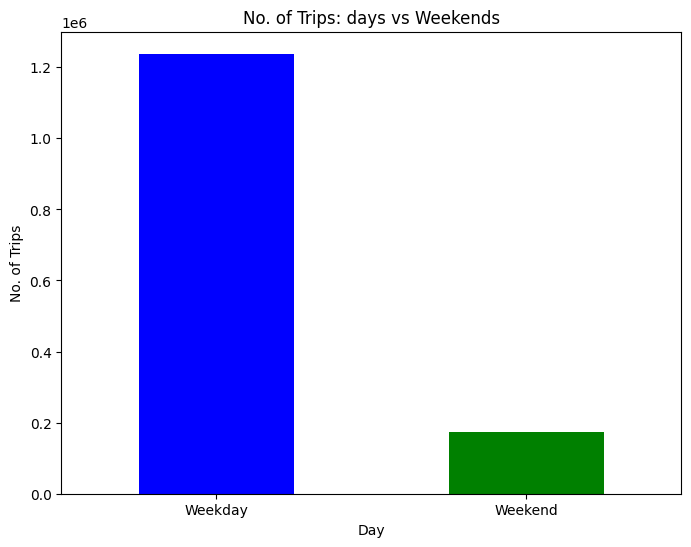

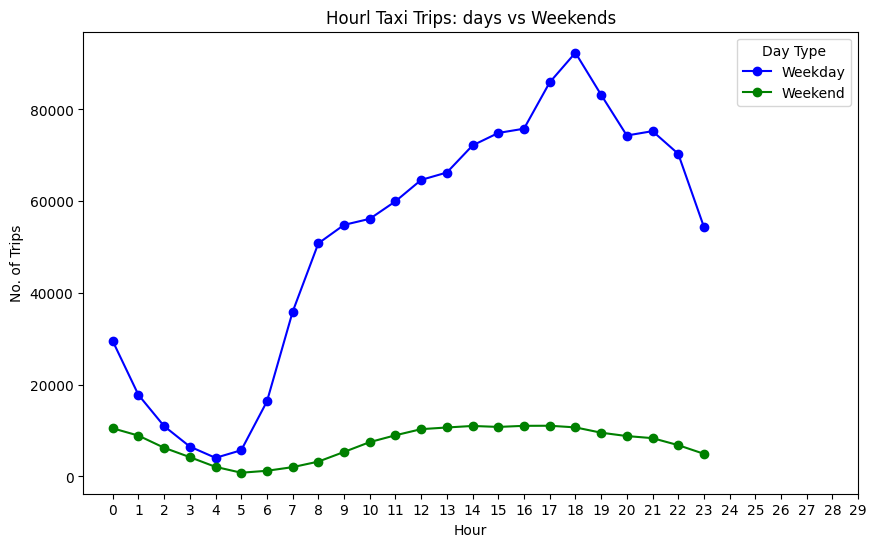

In [351]:
# Compare traffic trends for the week days and weekends
df_clean['pickup_day_of_week'] = pd.to_datetime(df_clean['tpep_pickup_datetime']).dt.weekday
df_clean['weekend'] = df_clean['pickup_day_of_week'].apply(lambda x: 'Weekend' if x >= 6 else 'Weekday')

day_traffic = df_clean['weekend'].value_counts()

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
day_traffic.plot(kind='bar', ax=ax, color=['blue', 'green'])

ax.set_xlabel('Day')
ax.set_ylabel('No. of Trips')
ax.set_title('No. of Trips: days vs Weekends')

# Display the plot
plt.xticks(rotation=0)
plt.show()

hourly_traffic = df_clean.groupby(['pickup_hour', 'weekend']).size().unstack()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
hourly_traffic.plot(kind='line', ax=ax, marker='o', color=['blue', 'green'])

ax.set_xlabel('Hour')
ax.set_ylabel('No. of Trips')
ax.set_title('Hourl Taxi Trips: days vs Weekends')
ax.legend(title='Day Type')

plt.xticks(range(0, 30))
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [353]:
# Find top 10 pickup and dropoff zones
top_10_pickup_zones = df_clean['PULocationID'].value_counts().head(10)
top_10_dropoff_zones = df_clean['DOLocationID'].value_counts().head(10)

print("Top-10-Pickup Zones:", top_10_pickup_zones)

# Print top 10 dropoff zones
print("\nTop-10-Dropoff Zones:", top_10_dropoff_zones)


Top 10 Pickup Zones: PULocationID
237    69858
161    67730
236    63695
132    63639
162    52690
138    51617
142    48921
186    48583
230    44372
170    43163
Name: count, dtype: int64

Top 10 Dropoff Zones: DOLocationID
236    67479
237    62507
161    55370
170    43202
239    42713
142    41487
162    41353
141    39774
230    39308
68     36097
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [361]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df_clean['PULocationID'].value_counts()
dropoff_counts = df_clean['DOLocationID'].value_counts()
overall_counts = pd.DataFrame({ 'pickup_count': pickup_counts, 'dropoff_count': dropoff_counts})
overall_counts['pickup_dropoff_ratio'] = overall_counts['pickup_count'] / overall_counts['dropoff_count']
top_10 = overall_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10 = overall_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
print("Top 10 Ratios:",top_10[['pickup_dropoff_ratio']])
print("\nBottom 10 Ratios:",bottom_10[['pickup_dropoff_ratio']])


Top 10 Ratios:      pickup_dropoff_ratio
70              13.857143
132              4.738570
138              2.871280
207              1.714286
186              1.650126
43               1.387699
114              1.382497
249              1.330899
162              1.274152
161              1.223226

Bottom 10 Ratios:      pickup_dropoff_ratio
70              13.857143
132              4.738570
138              2.871280
207              1.714286
186              1.650126
43               1.387699
114              1.382497
249              1.330899
162              1.274152
161              1.223226


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [371]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
df_clean['pickup_hour'] = pd.to_datetime(df_clean['tpep_pickup_datetime']).dt.hour
night_hours = df_clean[df_clean['pickup_hour'].between(23, 5, inclusive='both')]
night_pickup_zones = night_hours['PULocationID'].value_counts().head(10)
night_dropoff_zones = night_hours['DOLocationID'].value_counts().head(10)
print("Top 10 Pickup Zones during Night Hours (11 PM to 5 AM):",night_pickup_zones)
print("\nTop 10 Dropoff Zones during Night Hours (11 PM to 5 AM):",night_dropoff_zones)


Top 10 Pickup Zones during Night Hours (11 PM to 5 AM): Series([], Name: count, dtype: int64)

Top 10 Dropoff Zones during Night Hours (11 PM to 5 AM): Series([], Name: count, dtype: int64)


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [373]:
# Filter for night hours (11 PM to 5 AM)
df_clean['pickup_hour'] = df_clean['tpep_pickup_datetime'].dt.hour
night_hours = df_clean[df_clean['pickup_hour'].between(23, 5, inclusive='both')]
night_hours.head() 


Empty DataFrame
Columns: [Unnamed: 0, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, airport_fee, pickup_hour, pickup_day_of_week, pickup_day_name, pickup_month, pickup_quarter, trip_duration, payment_type_mapped, trip_duration_minutes, speed, weekend]
Index: []

[0 rows x 31 columns]

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

passenger_count
1.0    9.265596
2.0    4.998136
3.0    3.328625
4.0    3.932980
5.0    1.589161
6.0    1.284684
Name: fare_per_mile_per_passenger, dtype: float64


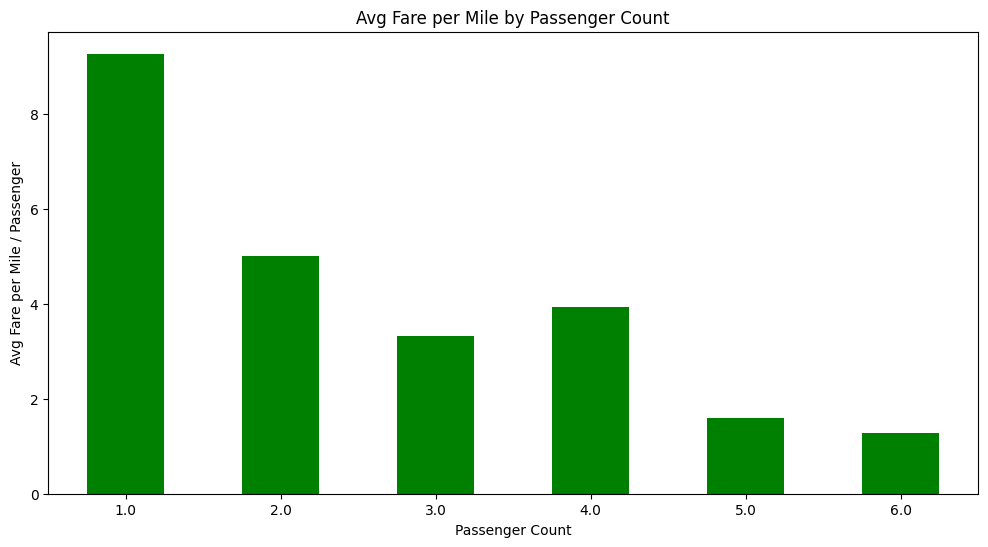

In [404]:
# Analyse the fare per mile per passenger for different passenger counts

df_clean['fare_per_mile'] = df_clean['fare_amount'] / df_clean['trip_distance']
df_clean['fare_per_mile_per_passenger'] = df_clean['fare_per_mile'] / df_clean['passenger_count']
fare_per_mile_per = df_clean.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
print(fare_per_mile_per)

plt.figure(figsize=(12, 6))
fare_per_mile_per.plot(kind='bar', color='green')
plt.title("Avg Fare per Mile by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Avg Fare per Mile / Passenger")
plt.xticks(rotation=0)
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

Average Fare per Mile by Day of the Week: day_of_week
0     9.155901
1     9.462652
2     9.325399
3     9.692463
4     9.294538
5     9.187552
6    10.344478
Name: fare_per_mile, dtype: float64

Average Fare per Mile by Hour of the Day: pickup_hour
0      7.699150
1      8.713650
2      8.167936
3      7.419247
4     11.310028
5     11.822035
6      9.940069
7      9.094701
8      9.024220
9      9.093885
10     9.272269
11     9.740125
12     9.968115
13    10.128906
14    10.186755
15    10.246555
16    12.260291
17    10.461273
18     9.700535
19     9.347256
20     8.002497
21     7.988508
22     8.309243
23     8.573553
Name: fare_per_mile, dtype: float64


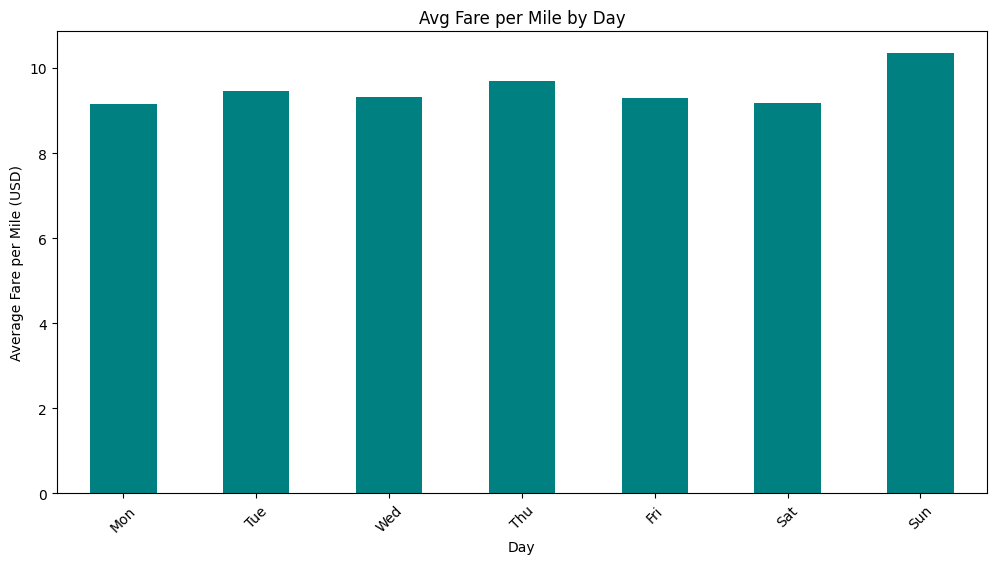

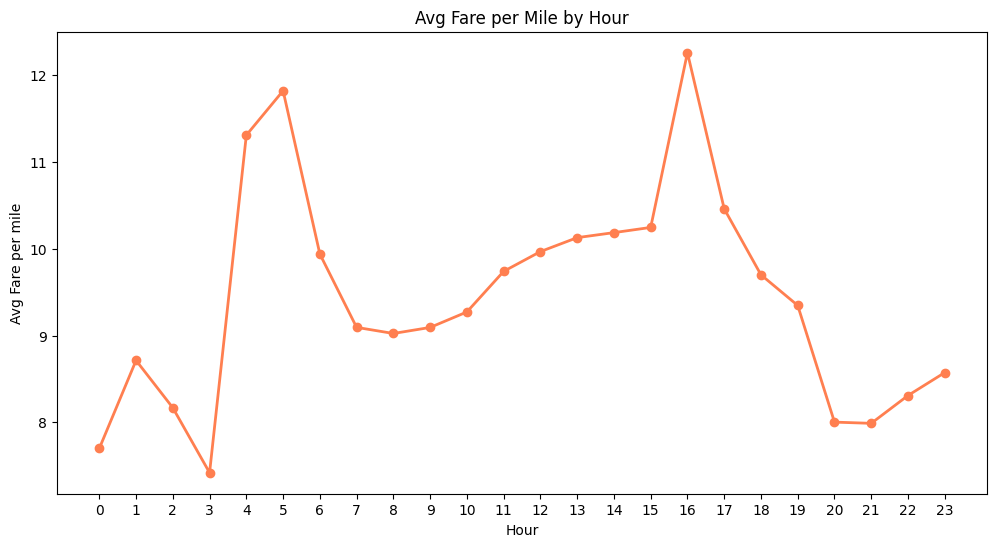

In [398]:
# Compare the average fare per mile for different days and for different times of the day
df_clean['tpep_pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'])
df_clean['fare_per_mile'] = df_clean['fare_amount'] / df_clean['trip_distance']
df_clean['day_of_week'] = df_clean['tpep_pickup_datetime'].dt.dayofweek
df_clean['pickup_hour'] = df_clean['tpep_pickup_datetime'].dt.hour
avg_fare_per_mile_day = df_clean.groupby('day_of_week')['fare_per_mile'].mean()
avg_fare_per_mile_hour = df_clean.groupby('pickup_hour')['fare_per_mile'].mean()
print("Average Fare per Mile by Day of the Week:",avg_fare_per_mile_day)
print("\nAverage Fare per Mile by Hour of the Day:",avg_fare_per_mile_hour)

# Plotting - day
plt.figure(figsize=(12, 6))
avg_fare_per_mile_day.plot(kind='bar', color='green')
plt.title("Avg Fare per Mile by Day")
plt.xlabel("Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

# Plotting - hour
plt.figure(figsize=(12, 6))
avg_fare_per_mile_hour.plot(kind='line', marker='o', color='coral', linestyle='-', linewidth=2, markersize=6)
plt.title("Avg Fare per Mile by Hour")
plt.xlabel("Hour")
plt.ylabel("Avg Fare per mile")
plt.xticks(range(0, 24))
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

Average Fare per Mile by VendorID: VendorID
1     7.927159
2    10.019026
Name: fare_per_mile, dtype: float64


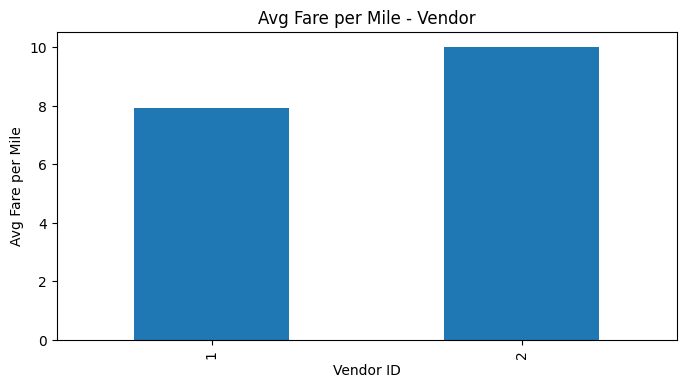

In [385]:
# Compare fare per mile for different vendors
df_clean['fare_per_mile'] = df_clean['fare_amount'] / df_clean['trip_distance']
avg_fare_per_mile_vendor = df_clean.groupby('VendorID')['fare_per_mile'].mean()
print("Average Fare per Mile by VendorID:",avg_fare_per_mile_vendor)
plt.figure(figsize=(8, 4))
avg_fare_per_mile_vendor.plot(kind='bar')
plt.title("Avg Fare per Mile - Vendor")
plt.xlabel("Vendor ID")
plt.ylabel("Avg Fare per Mile")
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

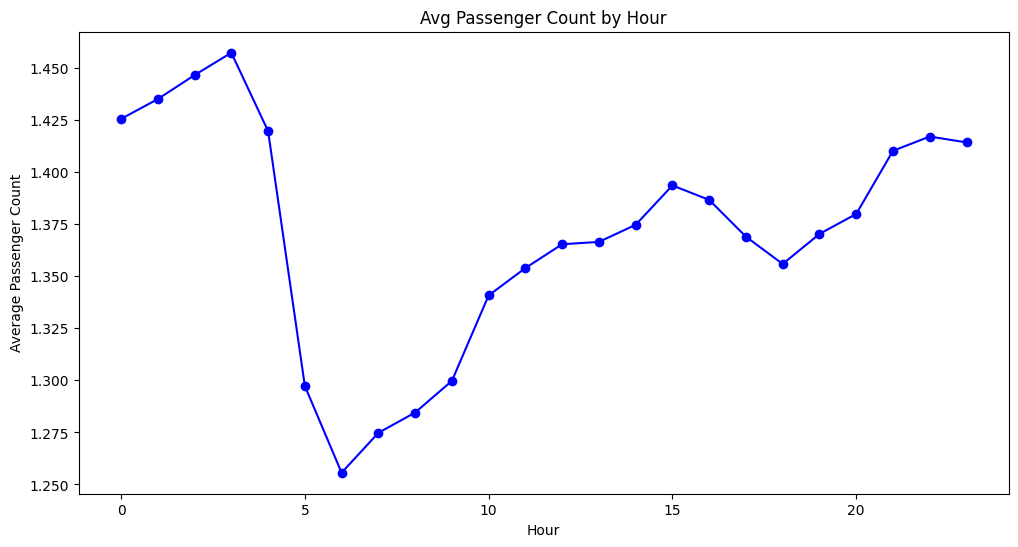

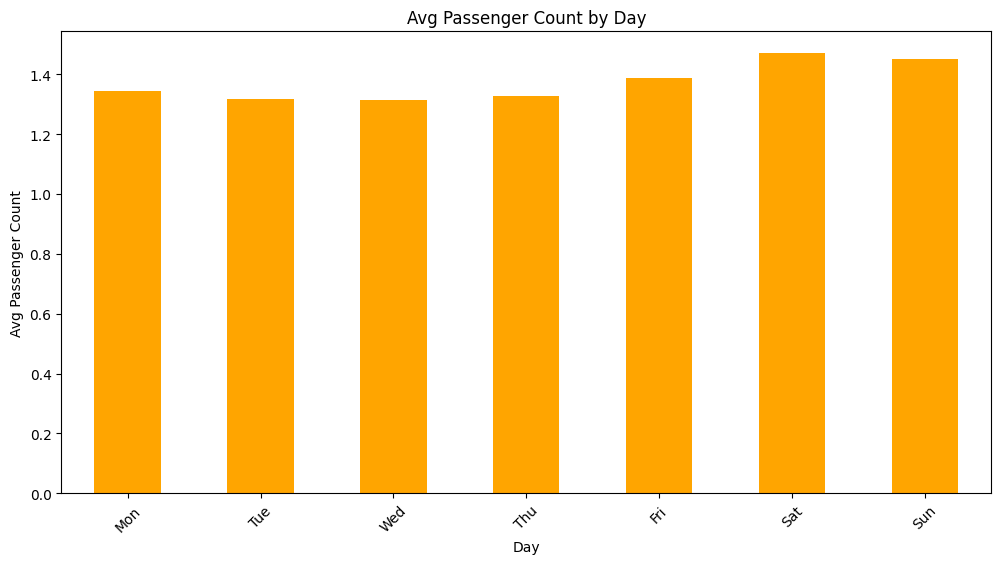

In [402]:
# See how passenger count varies across hours and days
df_clean['pickup_hour'] = df_clean['tpep_pickup_datetime'].dt.hour
df_clean['pickup_day'] = df_clean['tpep_pickup_datetime'].dt.dayofweek
psgnr_count_hour = df_clean.groupby('pickup_hour')['passenger_count'].mean()
psgnr_count_day = df_clean.groupby('pickup_day')['passenger_count'].mean()

#Plotting - Hour
plt.figure(figsize=(12, 6))
psgnr_count_hour.plot(kind='line', marker='o', color='blue')
plt.title("Avg Passenger Count by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Passenger Count")
plt.show()

#Plotting - Day
plt.figure(figsize=(12, 6))
psgnr_count_day.plot(kind='bar', color='orange')
plt.title("Avg Passenger Count by Day")
plt.xlabel("Day")
plt.ylabel("Avg Passenger Count")
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Avg Passenger Count by Pickup Zone: PULocationID
1      1.342857
2      1.000000
4      1.444048
6      3.000000
7      1.343874
         ...   
261    1.492691
262    1.333627
263    1.340871
264    1.321149
265    1.438596
Name: passenger_count, Length: 226, dtype: float64

Avg Passenger Count by Dropoff Zone: DOLocationID
1      1.627966
3      1.346154
4      1.355692
5      1.000000
6      1.260870
         ...   
261    1.443685
262    1.346075
263    1.350522
264    1.341766
265    1.485308
Name: passenger_count, Length: 258, dtype: float64


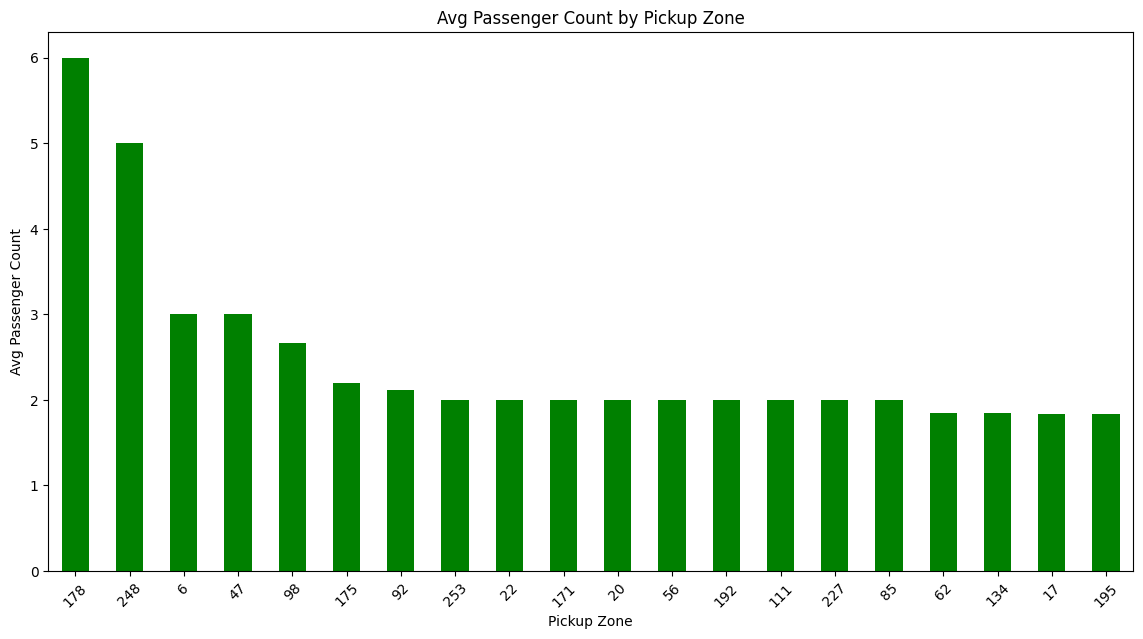

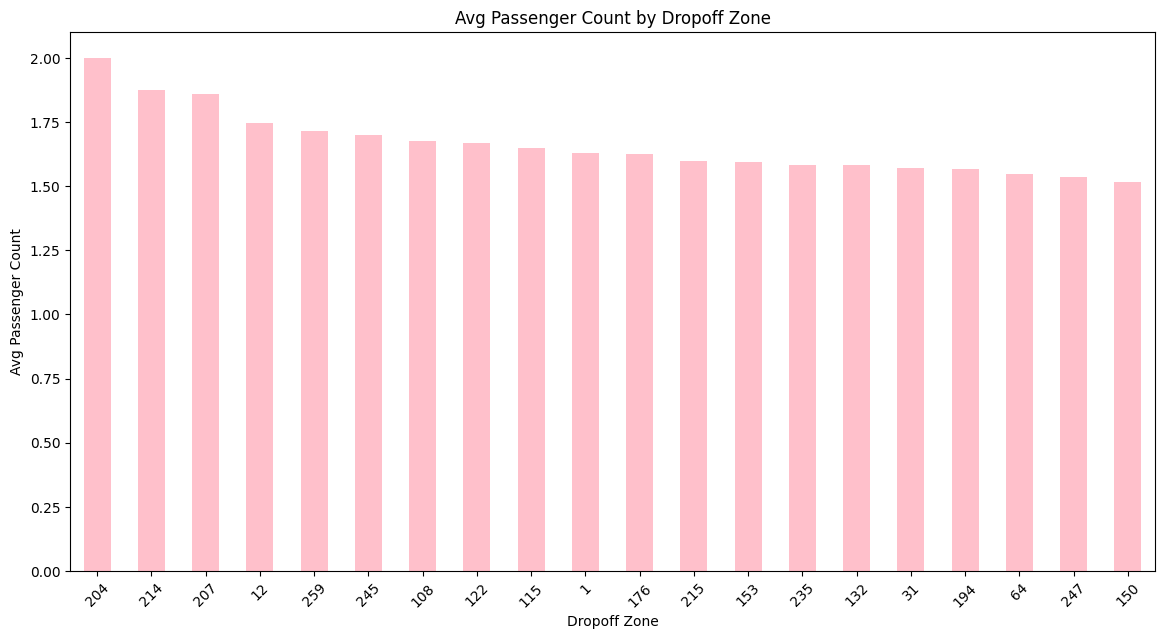

In [408]:
# How does passenger count vary across zones
passenger_count_by_pickup_zone = df_clean.groupby('PULocationID')['passenger_count'].mean()
passenger_count_by_dropoff_zone = df_clean.groupby('DOLocationID')['passenger_count'].mean()
print("Avg Passenger Count by Pickup Zone:",passenger_count_by_pickup_zone)
print("\nAvg Passenger Count by Dropoff Zone:",passenger_count_by_dropoff_zone)

# Plotting
plt.figure(figsize=(14, 7))
passenger_count_by_pickup_zone.sort_values(ascending=False).head(20).plot(kind='bar', color='green')
plt.title("Avg Passenger Count by Pickup Zone")
plt.xlabel("Pickup Zone")
plt.ylabel("Avg Passenger Count")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 7))
passenger_count_by_dropoff_zone.sort_values(ascending=False).head(20).plot(kind='bar', color='pink')
plt.title("Avg Passenger Count by Dropoff Zone")
plt.xlabel("Dropoff Zone")
plt.ylabel("Avg Passenger Count")
plt.xticks(rotation=45)
plt.show()




In [420]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [432]:
# How often is each surcharge applied?
surcharge_columns = ['tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

surcharge_counts = {}
for column in surcharge_columns:
    surcharge_counts[column] = df_clean[df_clean[column].notnull() & (df_clean[column] > 0)].shape[0]
total_trips = df_clean.shape[0]
surcharge_proportions = {i: j / total_trips for i, j in surcharge_counts.items()}
for surcharge, count in surcharge_counts.items():
    proportion = surcharge_proportions[surcharge]
    print(f"{surcharge}: {count} occurrences, {proportion:.2%} of total trips")

tolls_amount: 114484 occurrences, 8.10% of total trips
improvement_surcharge: 1412884 occurrences, 100.00% of total trips
congestion_surcharge: 1341457 occurrences, 94.94% of total trips
airport_fee: 116155 occurrences, 8.22% of total trips


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

- Increase Availability Near Airports:
Airports requirement is more during weekends and holidays. More number of taxis are required to be stationed at these airports, especially night or when the flight arrivals peak.

- Dynamic Pricing during Rush Hours:
Implementation of dynamic pricing during peak hours ==> fare rates can increase due to high demand, especially main / center zones / business/ office zone.

-Encouraging Tips:
Introduce tip incentives during peak hours. 

-Surcharge Management:
Automatic addition of airport fees, tolls, andother surchangres where necessary to avoid potential loss in revenue.

- Route Optimization:
Utilizaton of real-time traffic data and routing algorithms can help reduce trip durations, especially during rush/peak hours.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

- Peak Hours (Morning and Evening Rush):
Position cabs near office areas and transport hubs. Focus on business/office areas.

- Peak of arrivals at airport :
Position cabs near airport. Focus hours when a lot of arrivals happen during the day (especially during early morning hours).

- Peak hours for Hangout/Entertainments zones: 
Position cabs near entertainment zones. Especially during position cabs near famous food places/tourist places/hangout places/movies, etc.

- Event driven:
Temporarily position cabs in and around an event (sports/corporate/big movie release/new restaurant opening, etc). 


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

- Pricing in peak hours (weekdays and weekends):
Increase prices from 1.2 - 1.4 during the peaks by analyzing the demand in real time in busy zones.

- Pricing in OFF peak hours(weekdays and weekends):
Adjust the pricing to normal rates or discounted rates during the off peak hours to encourage more bookings.

- Pricing based on distance :
In high demand areas price of fare per mile can be low for shorter distance
Other wise the price of fare per mile can be higher for longer distance

- Fare prediction Algorithm:
Use prediction algoritms to come up with competative pricing during peak hours/ in busy areas/ during weekend / near famous hangout places etc.

- Offer discounts and Promotions:
With the help of brand and marketing strategy use brand promotions in form of discounts.
As part of customer loyalty, (with help of algorithms) provide x% of customers when they complete n number of trips in y number of days.

- Analyse the competitor rates frequently